## Задача 1

Для неявного метода:

$u_{n+1}=u_n+Δt⋅λu_{n+1}$

$u_{n+1}=\frac{u_n}{1-\lambda\triangle t}$
​
 .

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def explicit_euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

In [3]:
def implicit_euler_solve(lam, u0, T, dt):
    """Решает du/dt = lambda u на 0 < t < T с u(t=0) = u0 при помощи неявного метода Эйлера."""
    num_steps = int(T / dt)
    tt = np.linspace(0, T, num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = u0
    
    for n in range(num_steps):
        y[n+1] = y[n] / (1 - lam * dt)
    
    return tt, y

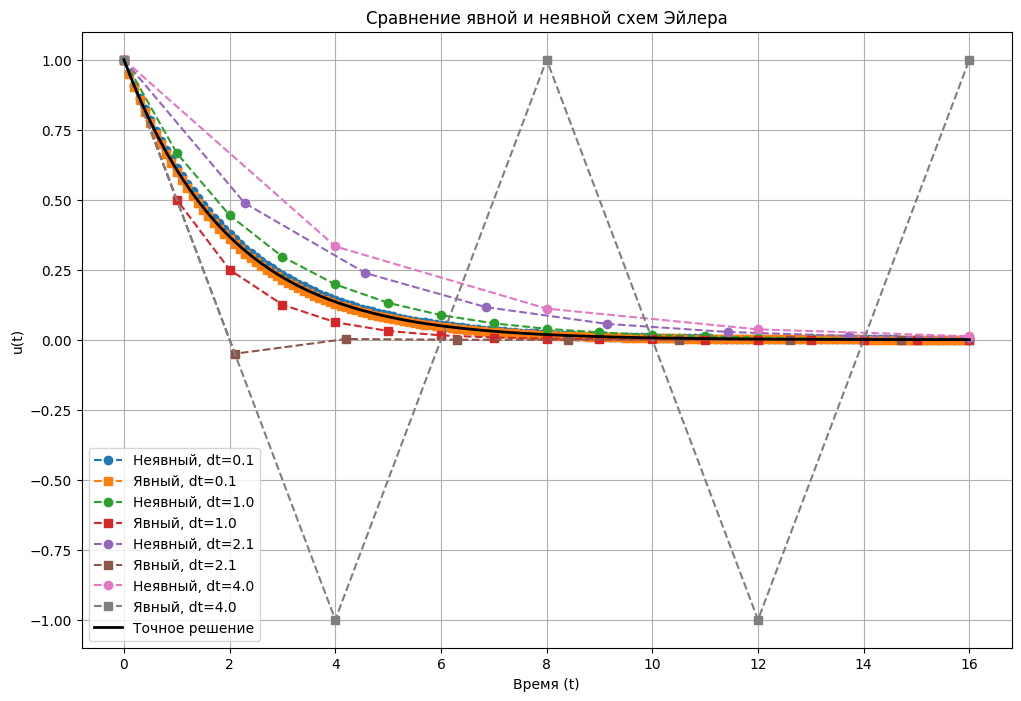

In [4]:
lam = -0.5
u0 = 1.0
T = 8 / abs(lam)

# Шаги интегрирования
dts = [0.1, 1.0, 2.1, 4.0]

plt.figure(figsize=(12, 8))

for dt in dts:
    tt_implicit, y_implicit = implicit_euler_solve(lam, u0, T, dt)
    tt_explicit, y_explicit = explicit_euler_solve(lam, u0, T, dt)
    
    plt.plot(tt_implicit, y_implicit, 'o--', label=f'Неявный, dt={dt}')
    plt.plot(tt_explicit, y_explicit, 's--', label=f'Явный, dt={dt}')

# Аналитическое решение
tt_analytical = np.linspace(0, T, 100)
y_analytical = np.exp(lam * tt_analytical)
plt.plot(tt_analytical, y_analytical, 'k-', lw=2, label='Точное решение')

plt.xlabel('Время (t)')
plt.ylabel('u(t)')
plt.title('Сравнение явной и неявной схем Эйлера')
plt.legend()
plt.grid(True)
plt.show()

## Задача 2

$u_{k+1}=u_k+τAu_k=(I+τA)u_k$
​


In [7]:
def euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        Construct the solution for t ∈ [0, T)
    dt : float
        Integration step size τ
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    ndim = a.shape[0]
    
    y = np.zeros((num_steps + 1, ndim))
    y[0, :] = u0
    
    for k in range(num_steps):
        y[k + 1, :] = y[k, :] + dt * a @ y[k, :]
    
    return tt, y

Точное решение через матричную экспоненту

$u(t)=e^{At}u_0$

In [5]:
from scipy.linalg import expm

def mat_exp_solve(a, u0, tt):
    """Construct the solution of du/dt = A u with u(0) = u0 at times `tt`.
    
    Parameters
    ----------
    a : ndarray, shape (ndim, ndim)
        The matrix A.
    u0 : ndarray, shape (ndim,)
        Initial condition.
    tt : ndarray, shape (n,)
        The values of t.
        
    Returns
    -------
    u : ndarray, shape (n, ndim)
        u[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    tt = np.asarray(tt, dtype=float)
    
    u = np.zeros((len(tt), len(u0)))
    for i, t in enumerate(tt):
        u[i, :] = expm(a * t) @ u0
    
    return u

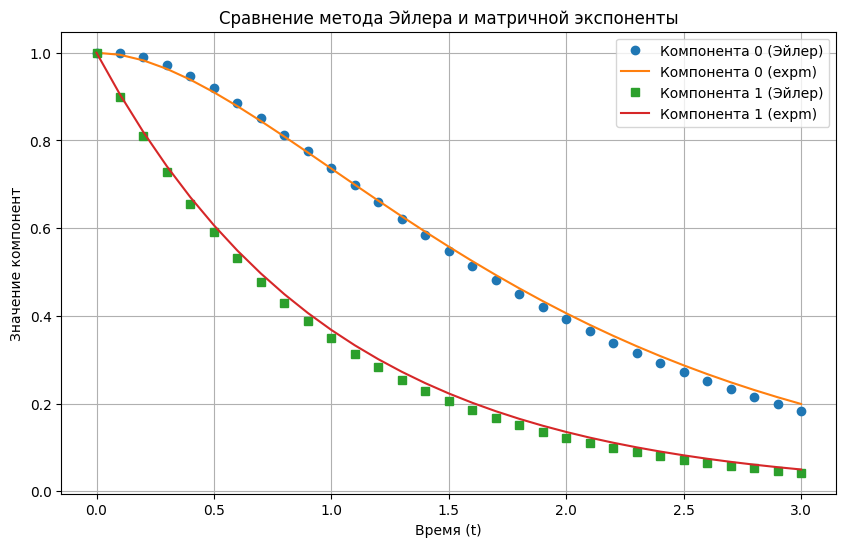

In [9]:
a = np.array([[-1, 1],
              [0, -1]], dtype=float)

# Решение методом Эйлера
t, y = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)

# Точное решение через матричную экспоненту
ym = mat_exp_solve(a, [1, 1], t)

# Графики
plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0], 'o', label='Компонента 0 (Эйлер)')
plt.plot(t, ym[:, 0], '-', label='Компонента 0 (expm)')

plt.plot(t, y[:, 1], 's', label='Компонента 1 (Эйлер)')
plt.plot(t, ym[:, 1], '-', label='Компонента 1 (expm)')

plt.xlabel('Время (t)')
plt.ylabel('Значение компонент')
plt.title('Сравнение метода Эйлера и матричной экспоненты')
plt.legend(loc='best')
plt.grid(True)
plt.show()